# 직교 행렬

In [1]:
import numpy as np

In [11]:
Q1 = np.array([[1, -1], [1, 1]])/np.sqrt(2)
Q2 = np.array([[1, 2, 2], [2, 1, -2], [-2, 2, -1]])/3

In [12]:
np.allclose(Q1.T@Q1, np.diag(np.ones(Q1.shape[0])))

True

In [13]:
np.allclose(Q2.T@Q2, np.diag(np.ones(Q2.shape[0])))

True

## 연습 문제 8-1
- 정방 행렬Q는 다음 등식을 만족한다
    - $Q^TQ = QQ^T = Q^{-1}Q = QQ^{-1} = I$
- 난수 행렬 Q를 생성하고, $Q^T$와 $Q^{-1}$를 계산하는 코드를 작성해 이를 구현 하라
- 위 네식이 모두 단위 행렬이 됨을 보여라

In [22]:
n = 5

Q, _ = np.linalg.qr(np.random.randn(n, n))
Qt = Q.T
Qinv = np.linalg.inv(Q)

In [26]:
np.allclose(Qt@Q, np.diag(np.ones(Q.shape[0])))

True

In [27]:
np.allclose(Q@Qt, np.diag(np.ones(Q.shape[0])))

True

In [29]:
np.allclose(Qinv@Q, np.diag(np.ones(Q.shape[0])))

True

In [30]:
np.allclose(Q@Qinv, np.diag(np.ones(Q.shape[0])))

True

# 그람-슈미트 과정

## 연습 문제 8-3
- 그람-슈미츠 과정을 구현
- 4x4 난수 행렬 사용
- np.linalg.qr의 Q와 대조

In [91]:
A = np.random.randn(4, 4)

u1 = A[:, 0] / np.linalg.norm(A[:, 0])  # Step 1: Normalize the first vector
a2 = A[:, 1]
u2 = a2 - np.dot(u1, a2) * u1  # Step 2: Ensure orthogonality to the first vector
u2 = u2 / np.linalg.norm(u2)  # Step 3: Normalize the second vector

a3 = A[:, 2]
u3 = a3 - np.dot(u1, a3) * u1 - np.dot(u2, a3) * u2  # Ensure orthogonality to the first two vectors
u3 = u3 / np.linalg.norm(u3)  # Normalize the third vector

a4 = A[:, 3]
u4 = a4 - np.dot(u1, a4) * u1 - np.dot(u2, a4) * u2 - np.dot(u3, a4) * u3  # Ensure orthogonality to the first three vectors
u4 = u4 / np.linalg.norm(u4)  # Normalize the fourth vector

q = np.vstack([u1, u2, u3, u4]).T  # Forming the orthogonal matrix Q

In [94]:
np.allclose(q@q.T, np.diag(np.ones(A.shape[0])))

True

In [97]:
q

array([[ 0.35723876,  0.01550276, -0.93073311,  0.07665517],
       [ 0.42440601,  0.87443896,  0.18897137,  0.139735  ],
       [-0.81364186,  0.4790118 , -0.31282661, -0.10331569],
       [ 0.17391646,  0.07525865, -0.01285368, -0.9817963 ]])

In [95]:
Q, _ = np.linalg.qr(A)

In [96]:
Q

array([[-0.35723876, -0.01550276, -0.93073311, -0.07665517],
       [-0.42440601, -0.87443896,  0.18897137, -0.139735  ],
       [ 0.81364186, -0.4790118 , -0.31282661,  0.10331569],
       [-0.17391646, -0.07525865, -0.01285368,  0.9817963 ]])

In [62]:
# create the matrix 
m = 4
n = 4
A = np.random.randn(m,n)

# initialize
Q = np.zeros((m,n))


# the GS algo
for i in range(n):
    
    # initialize
    Q[:,i] = A[:,i]
    
    # orthogonalize
    a = A[:,i] # convenience
    for j in range(i): # only to earlier cols
        q = Q[:,j] # convenience
        Q[:,i]=Q[:,i]-np.dot(a,q)/np.dot(q,q)*q
    
    # normalize
    Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])

    
# "real" QR decomposition for comparison
Q2,R = np.linalg.qr(A)


# note the possible sign differences.
# seemingly non-zero columns will be 0 when adding
print( np.round( Q-Q2 ,10) ), print(' ')
print( np.round( Q+Q2 ,10) )

[[ 0.22194118 -1.17160838  0.         -1.51842776]
 [-0.71772783  1.45667757  0.         -1.06275982]
 [-0.01915562  0.08928834  0.         -0.71323684]
 [-1.85344057 -0.70530266 -0.          0.2370905 ]]
 
[[ 0.          0.          0.52197035  0.        ]
 [-0.          0.          0.4832171   0.        ]
 [-0.          0.         -1.86626736 -0.        ]
 [-0.         -0.         -0.10532959 -0.        ]]


# QR 분해

In [31]:
A = np.random.randn(6,6)
Q, R = np.linalg.qr(A)

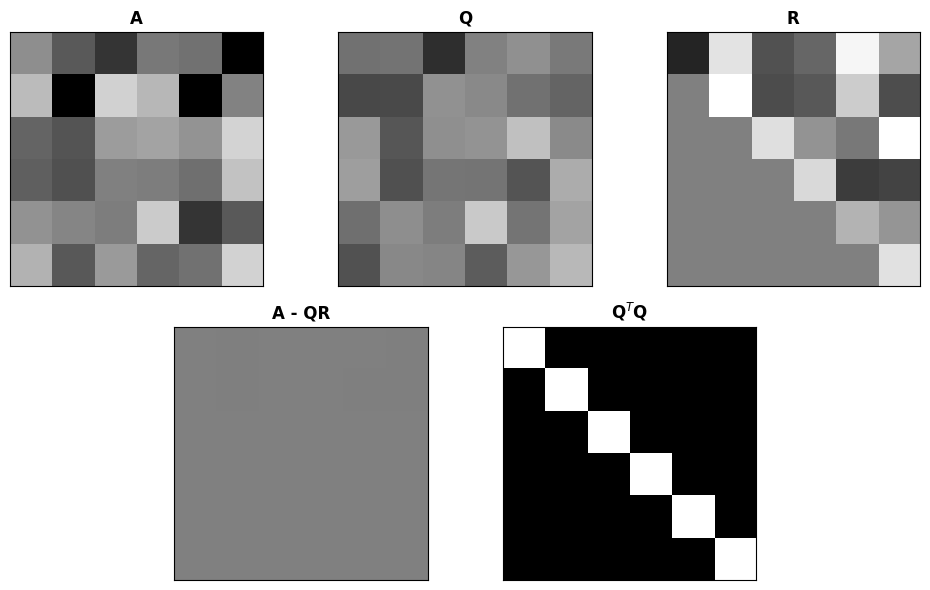

In [34]:
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec


# show the matrices
fig = plt.figure(figsize=(10,6))
axs = [0]*5
c = 1.5 # color limits

gs1 = gridspec.GridSpec(2,6)
axs[0] = plt.subplot(gs1[0,:2])
axs[0].imshow(A,vmin=-c,vmax=c,cmap='gray')
axs[0].set_title('A',fontweight='bold')

axs[1] = plt.subplot(gs1[0,2:4])
axs[1].imshow(Q,vmin=-c,vmax=c,cmap='gray')
axs[1].set_title('Q',fontweight='bold')

axs[2] = plt.subplot(gs1[0,4:6])
axs[2].imshow(R,vmin=-c,vmax=c,cmap='gray')
axs[2].set_title('R',fontweight='bold')

axs[3] = plt.subplot(gs1[1,1:3])
axs[3].imshow(A - Q@R,vmin=-c,vmax=c,cmap='gray')
axs[3].set_title('A - QR',fontweight='bold')

axs[4] = plt.subplot(gs1[1,3:5])
axs[4].imshow(Q.T@Q,cmap='gray')
axs[4].set_title(r'Q$^T$Q',fontweight='bold')

# remove ticks from all axes
for a in axs:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.show()

In [37]:
A = np.array([[1, -1]]).T
A

array([[ 1],
       [-1]])

In [40]:
Q, R = np.linalg.qr(A, 'complete')
Q*np.sqrt(2)

array([[-1.,  1.],
       [ 1.,  1.]])

In [41]:
Q, R = np.linalg.qr(A, 'reduced')
Q*np.sqrt(2)

array([[-1.],
       [ 1.]])

## 연습 문제 8-3
- 6x6난수 행렬의 QR 분해로 U라는 직교 행렬을 만든다.
    - U의 QR분해를 계산하여 R=I임을 확인 한다
- U의 노름을 10에서 15 의 값으로 수정 한다.
    - R의 대각성분이 10에서 15인 대각 행렬임을 확인한다.
    - $Q^TQ$는 무엇인가?
- $u_{1, 4} = 0$으로 설정, U의 직교성을 깨뜨린다
    - R은 어떻게 되고 그 이유는?

In [126]:
U, _ = np.linalg.qr(np.random.randn(6,6))
_, R = np.linalg.qr(U)

np.allclose(R, np.diag(np.ones(U.shape[0])))

True

In [127]:
for i in range(U.shape[0]):
    U[:, i] = U[:, i]*(10 + i)
Q, R = np.linalg.qr(U)    
print(np.diag(R))
print( np.round(Q.T@Q,3) )

[10. 11. 12. 13. 14. 15.]
[[ 1.  0. -0.  0. -0. -0.]
 [ 0.  1.  0.  0. -0. -0.]
 [-0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1. -0.  0.]
 [-0. -0.  0. -0.  1. -0.]
 [-0. -0.  0.  0. -0.  1.]]


In [128]:
U[0, 3] = 0
Q, R = np.linalg.qr(U)

In [129]:
print( np.round(R,3) )

[[10.     0.    -0.    -2.848  0.    -0.   ]
 [ 0.    11.    -0.    -1.756 -0.    -0.   ]
 [ 0.     0.    12.     0.77   0.    -0.   ]
 [ 0.     0.     0.    11.811  0.969  2.344]
 [ 0.     0.     0.     0.    13.966 -0.163]
 [ 0.     0.     0.     0.     0.    14.815]]


- 정답

In [99]:
# create an orthogonal matrix, call it U (to avoid confusing with Q)
U = np.linalg.qr( np.random.randn(6,6) )[0]


# part 2: modulate the column norms
for i in range(U.shape[0]):
    U[:,i] = U[:,i]*(10+i)


# part 3: Change one matrix element
U[0,3] = 0 # this is q_{1,4}


# QR decomp
q,r = np.linalg.qr(U)

# show R and, for part 2, Q'Q
print( np.round(r,3) ), print(' ')
# print( np.round(Q.T@Q,4))

[[10.    -0.     0.    -4.067  0.    -0.   ]
 [ 0.    11.    -0.    -3.36   0.     0.   ]
 [ 0.     0.    12.    -3.076 -0.    -0.   ]
 [ 0.     0.     0.     6.44  -4.741 -0.192]
 [ 0.     0.     0.     0.    13.173 -0.069]
 [ 0.     0.     0.     0.     0.    14.999]]
 


(None, None)

## 연습 문제 8-4
- 연습 문제 7-2 코드를 복사해 행렬을 입력 받고 그 역행렬을 출력하는 파이썬 함수에 붙여 넣는다
    - 입력 행렬이 정방, 최대계수인지 확인하는 코드도 추가 가능
- 5x5 난수 행렬 생성
- 전통적인 방법과, QR분해 방법을 사용 역행렬 생성
- 역추정 오차는 행렬과 계산된 역행렬의 곱으로 부터 np.eye 의 진짜 단위 행렬에 대한 유클리드 거리 계산
- 그림 8-3과 같이 결과를 막대 그래프로 만들어 두 방법을 x, 오차를 y축에 표시
- 코드를 여러번 실행, 막대 그래프 표시
- 30x30 행렬로 다시 수행 
- 결과의 일관성이 있는가?

In [132]:
# a function to compute the inverse
def oldSchoolInv(A):

    # matrix size
    m = A.shape[0]

    # abort if non-square
    if not np.diff(A.shape)[0]==0:
        raise Exception('Matrix must be square.')

    # abort if singular
    if np.linalg.matrix_rank(A)<m:
        raise Exception('Matrix must be full-rank.')

    # initialize
    M = np.zeros((m,m)) # minors matrix
    G = np.zeros((m,m)) # grid matrix

    # compute minors matrix
    for i in range(m):
        for j in range(m):

            # select rows and cols
            rows = [True]*m
            rows[i] = False

            cols = [True]*m
            cols[j] = False

            # compute the minors
            M[i,j]=np.linalg.det(A[rows,:][:,cols])

            # compute Grid
            G[i,j] = (-1)**(i+j)

    # compute cofactors matrix
    C = M * G

    # compute adjugate matrix
    return C.T / np.linalg.det(A)

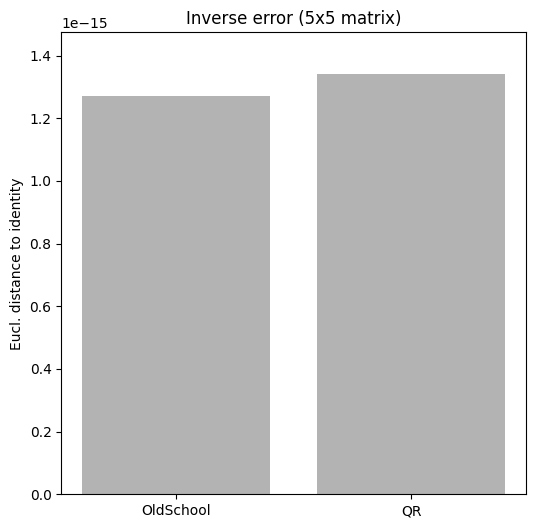

In [136]:
# a function to compute the inverse
def oldSchoolInv(A):

    # matrix size
    m = A.shape[0]

    # abort if non-square
    if not np.diff(A.shape)[0]==0:
        raise Exception('Matrix must be square.')

    # abort if singular
    if np.linalg.matrix_rank(A)<m:
        raise Exception('Matrix must be full-rank.')

    # initialize
    M = np.zeros((m,m)) # minors matrix
    G = np.zeros((m,m)) # grid matrix

    # compute minors matrix
    for i in range(m):
        for j in range(m):

            # select rows and cols
            rows = [True]*m
            rows[i] = False

            cols = [True]*m
            cols[j] = False

            # compute the minors
            M[i,j]=np.linalg.det(A[rows,:][:,cols])

            # compute Grid
            G[i,j] = (-1)**(i+j)

    # compute cofactors matrix
    C = M * G

    # compute adjugate matrix
    return C.T / np.linalg.det(A)

# create a matrix
n = 5
A = np.random.randn(n,n)

# old-school inverse method
Ainv_old = oldSchoolInv(A)
AAi_old  = Ainv_old@A

# via QR
Q,R = np.linalg.qr(A)
Ainv_qr = oldSchoolInv(R)@Q.T
AAi_qr  = Ainv_qr@A



# differences
trueI = np.eye(n)
sse = [0,0] # sse = sum of squared errors
sse[0] = np.sqrt(np.sum((AAi_old-trueI)**2))
sse[1] = np.sqrt(np.sum((AAi_qr-trueI )**2))


# and plot
plt.figure(figsize=(6,6))

plt.bar(range(2),sse,color=[.7,.7,.7])
plt.xticks(range(2),labels=['OldSchool','QR'])
plt.ylim([0,np.max(sse)*1.1])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix)',ha='center')
plt.show()

## 연습 문제 8-5
- 앞 연습 문제를 100번 이상 반복하는 for문에 넣는다
- 각 반복마다 오차를 저장하고 모든 실험 결과를 평균과 개별 오차를 보여주는 그래프를 그린다.


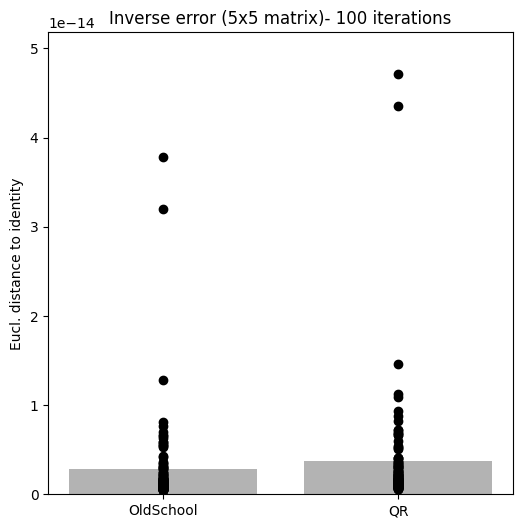

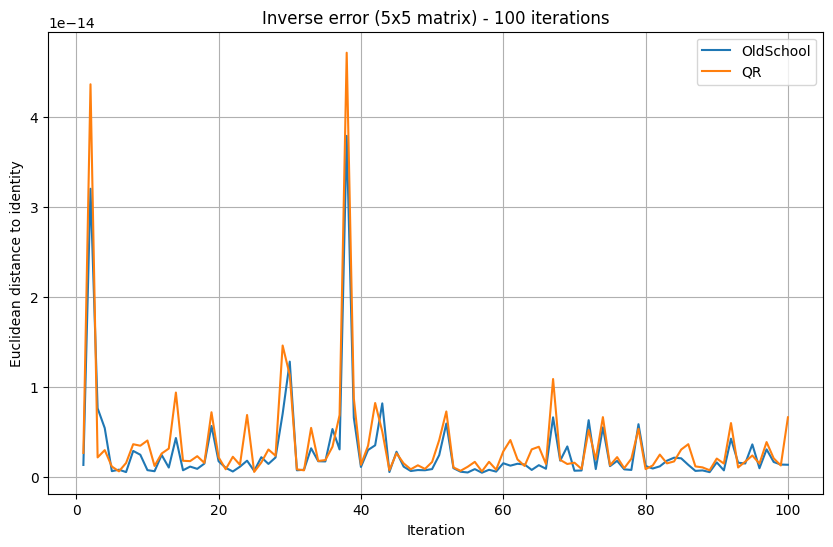

In [164]:
n = 5
k = 100

sse = np.zeros((k,2))


# Initialize lists to store results
sse_old = []
sse_qr = []

# Run the comparison for 30 iterations
for expi in range(k):
    A = np.random.randn(n,n)    
    # old-school inverse method
    Ainv_old = oldSchoolInv(A)
    AAi_old  = Ainv_old @ A

    # via QR
    Q, R = np.linalg.qr(A)
    Ainv_qr = np.linalg.inv(R) @ Q.T
    AAi_qr  = Ainv_qr @ A

    
    trueI = np.eye(n)
    sse[expi,0] = np.sqrt(np.sum((AAi_old-trueI)**2))
    sse[expi,1] = np.sqrt(np.sum((AAi_qr-trueI )**2))
    
    
# and plot
plt.figure(figsize=(6,6))

plt.plot(np.zeros(k),sse[:,0],'ko')
plt.plot(np.ones(k),sse[:,1],'ko')
plt.bar(range(2),np.mean(sse,axis=0),color=[.7,.7,.7])

plt.xticks(range(2),labels=['OldSchool','QR'])
plt.ylim([0,np.max(sse)*1.1])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix)- {k} iterations',ha='center')    

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, k+1), sse[:, 0], label='OldSchool')
plt.plot(range(1, k+1), sse[:, 1], label='QR')
plt.xlabel('Iteration')
plt.ylabel('Euclidean distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix) - {k} iterations')
plt.legend()
plt.grid(True)


plt.show()

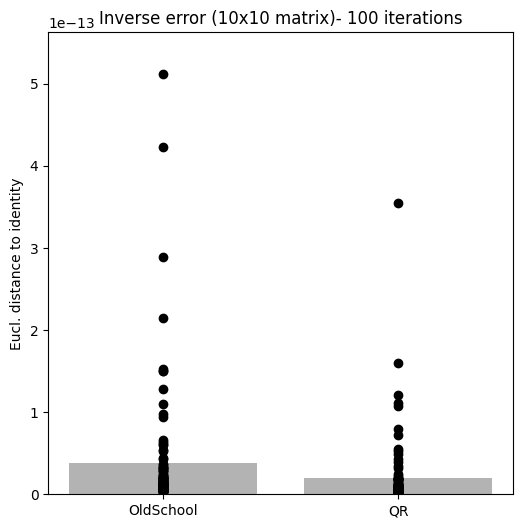

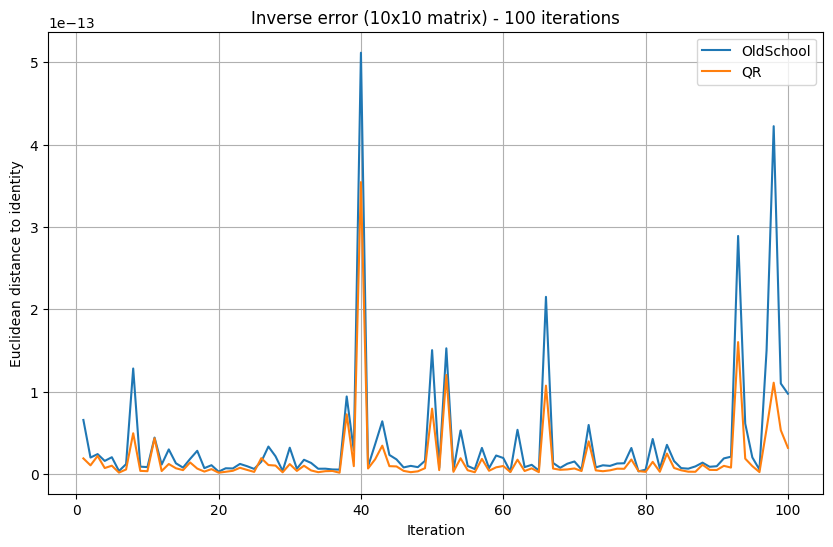

In [165]:
n = 10
k = 100

sse = np.zeros((k,2))


# Initialize lists to store results
sse_old = []
sse_qr = []

# Run the comparison for 30 iterations
for expi in range(k):
    A = np.random.randn(n,n)    
    # old-school inverse method
    Ainv_old = oldSchoolInv(A)
    AAi_old  = Ainv_old @ A

    # via QR
    Q, R = np.linalg.qr(A)
    Ainv_qr = np.linalg.inv(R) @ Q.T
    AAi_qr  = Ainv_qr @ A

    
    trueI = np.eye(n)
    sse[expi,0] = np.sqrt(np.sum((AAi_old-trueI)**2))
    sse[expi,1] = np.sqrt(np.sum((AAi_qr-trueI )**2))
    
    
# and plot
plt.figure(figsize=(6,6))

plt.plot(np.zeros(k),sse[:,0],'ko')
plt.plot(np.ones(k),sse[:,1],'ko')
plt.bar(range(2),np.mean(sse,axis=0),color=[.7,.7,.7])

plt.xticks(range(2),labels=['OldSchool','QR'])
plt.ylim([0,np.max(sse)*1.1])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix)- {k} iterations',ha='center')    

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, k+1), sse[:, 0], label='OldSchool')
plt.plot(range(1, k+1), sse[:, 1], label='QR')
plt.xlabel('Iteration')
plt.ylabel('Euclidean distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix) - {k} iterations')
plt.legend()
plt.grid(True)


plt.show()

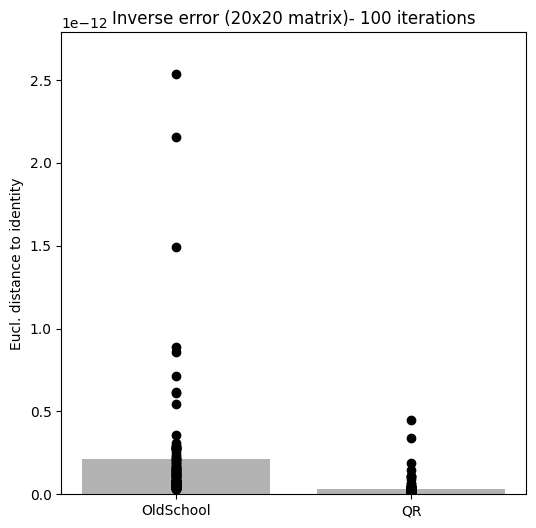

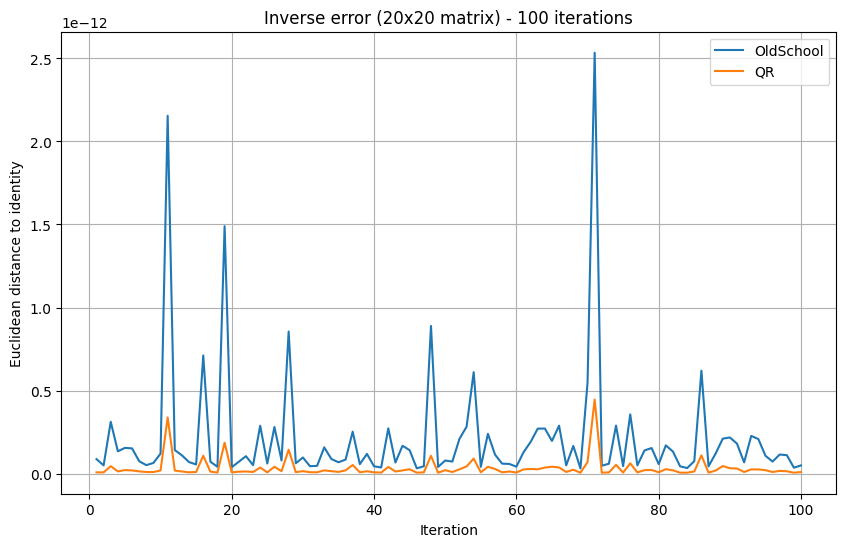

In [166]:
n = 20
k = 100

sse = np.zeros((k,2))


# Initialize lists to store results
sse_old = []
sse_qr = []

# Run the comparison for 30 iterations
for expi in range(k):
    A = np.random.randn(n,n)    
    # old-school inverse method
    Ainv_old = oldSchoolInv(A)
    AAi_old  = Ainv_old @ A

    # via QR
    Q, R = np.linalg.qr(A)
    Ainv_qr = np.linalg.inv(R) @ Q.T
    AAi_qr  = Ainv_qr @ A

    
    trueI = np.eye(n)
    sse[expi,0] = np.sqrt(np.sum((AAi_old-trueI)**2))
    sse[expi,1] = np.sqrt(np.sum((AAi_qr-trueI )**2))
    
    
# and plot
plt.figure(figsize=(6,6))

plt.plot(np.zeros(k),sse[:,0],'ko')
plt.plot(np.ones(k),sse[:,1],'ko')
plt.bar(range(2),np.mean(sse,axis=0),color=[.7,.7,.7])

plt.xticks(range(2),labels=['OldSchool','QR'])
plt.ylim([0,np.max(sse)*1.1])
plt.ylabel('Eucl. distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix)- {k} iterations',ha='center')    

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, k+1), sse[:, 0], label='OldSchool')
plt.plot(range(1, k+1), sse[:, 1], label='QR')
plt.xlabel('Iteration')
plt.ylabel('Euclidean distance to identity')
plt.title(f'Inverse error ({n}x{n} matrix) - {k} iterations')
plt.legend()
plt.grid(True)


plt.show()

## 연습 문제 8-6
- 난수 행렬의 QR분해를 통해 M X N 직교 행렬을 만든다
    - np.linalg.norm 으로 유도된 2-노름과 M의 제곱근으로 나누어 프로베니우스 노름을 계산, 모두 다 1 임을 확인한다.
- 행렬-벡터 곱셈을 사용, 유도된 노름의 의미를 알아 본다.
    - 무작위로 M개의 원소를 가진 열벡터 v를 생성
    - v와 Qv의 노름 계산
- 위 값이 같은 이유를 생각해 보자

In [169]:
n = 13
Q, R = np.linalg.qr(np.random.randn(n, n))

In [170]:
np.linalg.norm(Q, 2)

1.0000000000000002

In [171]:
np.sqrt(np.sum(Q**2)) / np.sqrt(n)

1.0

In [172]:
v = np.random.randn(n, 1)

norm_v = np.linalg.norm(v)
norm_Qv = np.linalg.norm(Q@v)

In [174]:
norm_v

2.784342108301992

In [175]:
norm_Qv

2.7843421083019924

||Qv|| = $(Qv)^TQv =  v^TQ^TQv = v^Tv$

- 정답

In [176]:
# create a random orthogonal matrix
n = 13
Q,R = np.linalg.qr(np.random.randn(n,n))

# print out the norms
print( np.linalg.norm(Q,2),               # induced 2-norm
       np.sqrt(np.sum(Q**2) )/np.sqrt(n) # manually computed Frobenius norm
)

1.0000000000000004 1.0


In [177]:
# effects of matrix multiplication on vector norm

# a random vector
v = np.random.randn(n,1)

# norms
norm_v  = np.linalg.norm(v)
norm_Qv = np.linalg.norm(Q@v)

# print them
print(norm_v)
print(norm_Qv)

2.945211730032152
2.945211730032152


## 연습 문제 8-7
- A가 높고 최대열수 일 때
- R의 처음 N 행은 상삼각 
- N+1부터 M까지의 행은 0


- 정답

In [2]:
import numpy as np

In [3]:
# the matrix
A = np.random.randn(10,4)

# get R
Q,R = np.linalg.qr(A,'reduce')
print(Q.shape)
print(R.shape)
# examine R
np.round(R,3)

(10, 10)
(10, 4)


array([[-4.404, -0.051, -0.307, -0.993],
       [ 0.   , -1.743, -0.94 ,  1.668],
       [ 0.   ,  0.   , -2.36 , -2.043],
       [ 0.   ,  0.   ,  0.   , -1.538],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ]])

In [5]:
Q,R = np.linalg.qr(A,'reduced')
print(Q.shape)
print(R.shape)
# examine R
np.round(R,3)

(10, 4)
(4, 4)


array([[-4.404, -0.051, -0.307, -0.993],
       [ 0.   , -1.743, -0.94 ,  1.668],
       [ 0.   ,  0.   , -2.36 , -2.043],
       [ 0.   ,  0.   ,  0.   , -1.538]])

In [6]:
# invertible submatrix
Rsub = R[:4,:]

# inverses
Rsub_inv = np.linalg.inv(Rsub)
Rleftinv = np.linalg.pinv(R)

# print out both
print('Full inverse of R submatrix:')
print(np.round(Rsub_inv,3)), print(f'\n\n')

print('Left inverse of R:')
print(Rleftinv.shape)
print(np.round(Rleftinv,3))

Full inverse of R submatrix:
[[-0.227  0.007  0.027  0.118]
 [-0.    -0.574  0.228 -0.926]
 [-0.    -0.    -0.424  0.563]
 [-0.    -0.    -0.    -0.65 ]]



Left inverse of R:
(4, 4)
[[-0.227  0.007  0.027  0.118]
 [-0.    -0.574  0.228 -0.926]
 [ 0.     0.    -0.424  0.563]
 [ 0.    -0.     0.    -0.65 ]]
